## tidy data
https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html

What is Tidy Data?
In this course, it is expected that your data be in some kind of tidy format. In short, a tidy dataset is a tabular dataset where:

each variable is a column  
each observation is a row  
each type of observational unit is a table

## Bar Charts
A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.  
  
https://www.youtube.com/watch?v=ybXcduB6cXA  
  
A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

pre:  
pip install seaborn

In [40]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# solution script imports
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2

pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


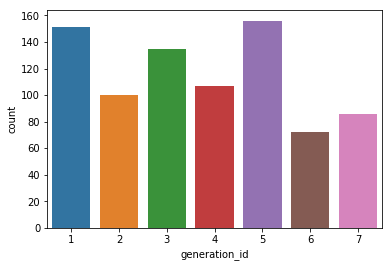

In [41]:
sb.countplot(data = pokemon, x = 'generation_id');

I used seaborn's countplot function to generate this chart. I also added an additional argument so that each bar has the same color.


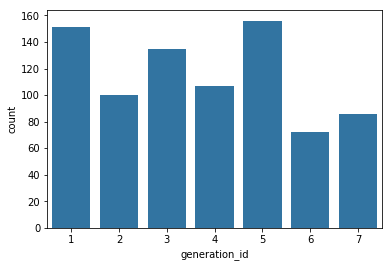

In [42]:
bar_chart_solution_1()

In [43]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


Created a horizontal bar chart since there are a lot of",
                  "Pokemon types. The unique() method was used to get the",
                  "number of different Pokemon species. I also added an xlabel",
                  "call to make sure it was clear the bar length represents",
                  "a relative frequency.

Text(0.5,0,'proportion')

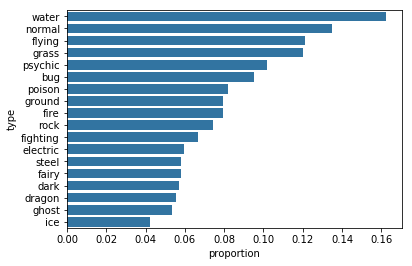

In [45]:
    # data setup
    pokemon = pd.read_csv('./data/pokemon.csv')
    pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()

    # get order of bars by frequency
    type_counts = pkmn_types['type'].value_counts()
    type_order = type_counts.index

    # compute largest proportionb
    n_pokemon = pkmn_types['species'].unique().shape[0]
    max_type_count = type_counts[0]
    max_prop = max_type_count / n_pokemon

    # establish tick locations and create plot
    base_color = sb.color_palette()[0]
    tick_props = np.arange(0, max_prop, 0.02)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    base_color = sb.color_palette()[0]
    sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
    plt.xticks(tick_props * n_pokemon, tick_names)
    plt.xlabel('proportion')

(-1.1179348023854199,
 1.1179347973199905,
 -1.1000000113671495,
 1.1358695883382608)

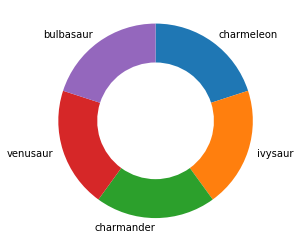

In [49]:
sorted_counts = pkmn_types['species'].head().value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

more  
https://matplotlib.org/api/_as_gen/matplotlib.patches.Wedge.html

(array([280., 119., 243., 113.,  48.,   1.,   2.,   0.,   0.,   1.]),
 array([ 36. ,  93.2, 150.4, 207.6, 264.8, 322. , 379.2, 436.4, 493.6,
        550.8, 608. ]),
 <a list of 10 Patch objects>)

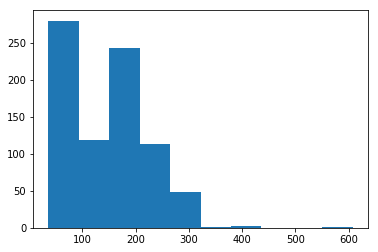

In [54]:
plt.hist(data = pokemon, x = 'base_experience')

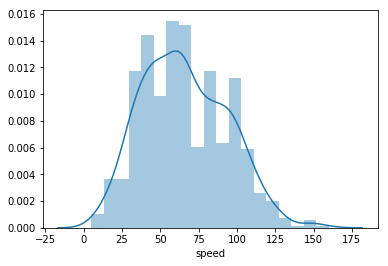

In [55]:
sb.distplot(pokemon['speed']);

Task: Pokémon have a number of different statistics that describe their combat capabilities. Here, create a histogram that depicts the distribution of 'special-defense' values taken. Hint: Try playing around with different bin width sizes to see what best depicts the data.

We used matplotlib's hist function to plot the data. We have also used numpy's arange function to set the bin edges. A bin size of 5 hits the main cut points, revealing a smooth, but skewed curves. Are there similar characteristics among Pokemon with the highest special defenses?

(array([ 6., 12., 29., 28., 49., 53., 66., 59., 63., 53., 57., 51., 52.,
        42., 37., 34., 29., 18., 14., 11., 10.,  4., 12.,  4.,  3.,  0.,
         9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.]),
 array([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,
         85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145,
        150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210,
        215, 220, 225, 230]),
 <a list of 42 Patch objects>)

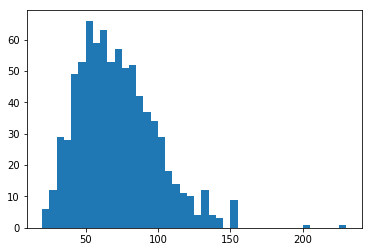

In [58]:
    # data setup
    pokemon = pd.read_csv('./data/pokemon.csv')

    bins = np.arange(20, pokemon['special-defense'].max()+5, 5)
    plt.hist(pokemon['special-defense'], bins = bins)

(0, 6)

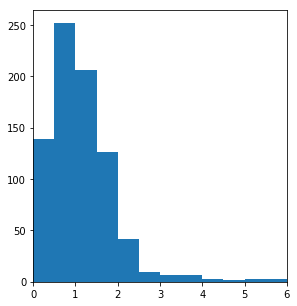

In [63]:
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bin_edges)

# histogram on right: focus in on bulk of data < 35
#plt.subplot(1, 2, 2)
#bin_edges = np.arange(0, 35+1, 1)
#plt.hist(data = df, x = 'skew_var', bins = bin_edges)
plt.xlim((0, 6))

**Task 1:** There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.  
  
There's a very long tail of Pokemon heights. Here, I've focused in on Pokemon of height 6 meters or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.

(0, 6)

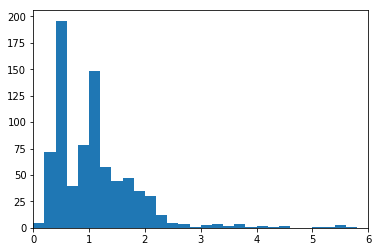

In [66]:
    # data setup
    pokemon = pd.read_csv('./data/pokemon.csv')

    bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
    plt.hist(data = pokemon, x = 'height', bins = bins)
    plt.xlim((0,6))

**Task 2:** In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an axis transformation as part of your visualization workflow.

Since Pokemon weights are so skewed, I used a log transformation on the x-axis. Bin edges are in increments of 0.1 powers of ten, with custom tick marks to demonstrate the log scaling.

Text(0.5,0,'Weight (kg)')

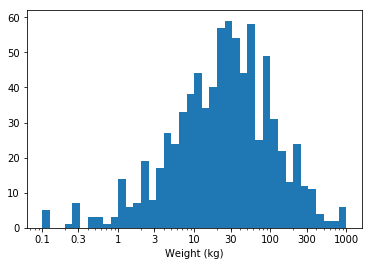

In [69]:
    # data setup
    pokemon = pd.read_csv('./data/pokemon.csv')

    bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
    ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    labels = ['{}'.format(val) for val in ticks]

    plt.hist(data = pokemon, x = 'weight', bins = bins)
    plt.xscale('log')
    plt.xticks(ticks, labels)
    plt.xlabel('Weight (kg)')

!!! **pip install statsmodels** !!!

/Users/usernameg/anaconda3/envs/env1/lib/python3.6/site-packages/seaborn/distributions.py:289: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)


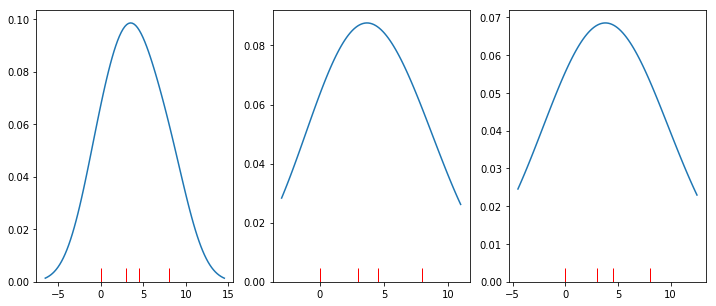

In [75]:
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})